In [20]:
import pandas as pd

data = pd.read_csv('../../data/processed/import_declarations_intermax_daily.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Abgabe
Date,
2017-01-02,439.79
2017-01-03,2107.94
2017-01-04,215.37
2017-01-05,0.00
2017-01-06,0.00


In [21]:
data['Abgabe_avg'] = data['Abgabe'].rolling(window=30).mean()

data = data.dropna(subset=['Abgabe_avg'])
data = data.drop(columns='Abgabe')

In [22]:
data = data.dropna(subset=['Abgabe_avg'])

In [23]:
from data_preperation import split_data

train, test = split_data(data, test_split=0.80)

train

train: 812 , test: 204


,Abgabe_avg
Date,
2017-01-31,414.082333
2017-02-01,399.422667
2017-02-02,329.158000
2017-02-03,321.979000
2017-02-04,321.979000
...,...
2019-04-18,1398.479333
2019-04-19,1398.479333
2019-04-20,1398.479333


In [24]:
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(endog=train.Abgabe_avg, dates=train.index, trend="add").fit()

model.summary()

/home/stefaneissler/customsfee_forecasting/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Abgabe_avg,No. Observations:,812
Model:,ExponentialSmoothing,SSE,11448838.217
Optimized:,True,AIC,7765.766
Trend:,Additive,BIC,7784.564
Seasonal:,None,AICC,7765.870
Seasonal Periods:,None,Date:,"Fri, 22 Mar 2024"
Box-Cox:,False,Time:,12:09:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9706530,alpha,True
smoothing_trend,0.0008748,beta,True


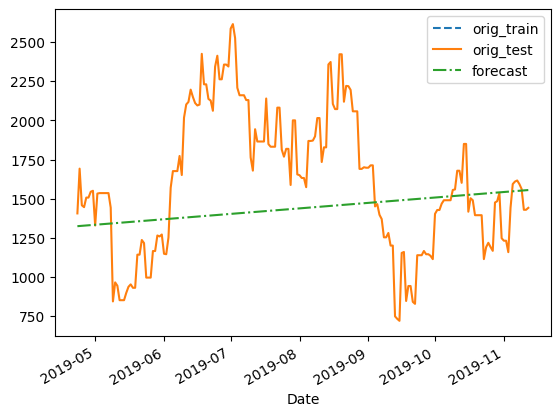

In [25]:
from data_preperation import plot_forecast

plot_forecast(model, test.index[1], train, test)

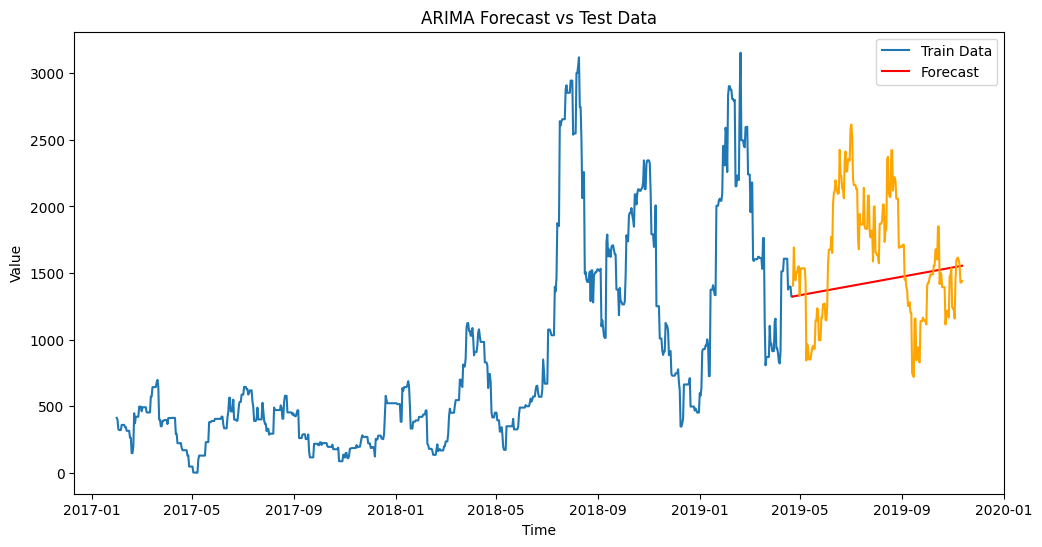

In [26]:
import matplotlib.pyplot as plt

forecast = model.forecast(test.shape[0])

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.plot(test, color='orange')
plt.title('ARIMA Forecast vs Test Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

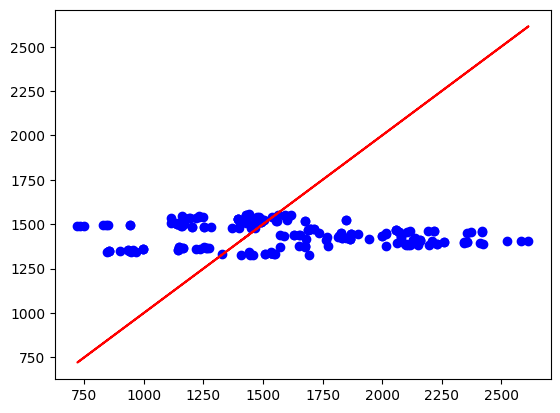

In [27]:
plt.scatter(test.Abgabe_avg, forecast, color='blue', label='Predictions')
plt.plot(test.Abgabe_avg, test.Abgabe_avg, color='red')

In [28]:
from data_preperation import get_validation_matrix

validation_results = get_validation_matrix(forecast, test.Abgabe_avg, train)
validation_results['name'] = 'ExponentialSmoothing'

In [29]:
from data_preperation import save_metrics_to_csv

save_metrics_to_csv(validation_results)

Metrics saved to metrics.csv
